# Certificate in Data Science | Milestone 3 |  
- Regression Simulation 

> University of Washington  
> October 2019  
> N. HICKS

## Project Guidance and Instructions

Milestone 3 allows you to apply the knowledge you gained in Unit 3 of the course.  
In this milestone, you need to:

    1. Prepare the data for modeling, and 
    2. Build an initial model that will be refined in Milestone 4.
<br>
For Milestone 3:

    1. Prepare the data via cleaning, normalization, encoding, et cetera; and
    2. Generate and evaluate a working model (linear, or time series).


Note:  
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

## Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import qgrid
from sklearn import preprocessing
import statsmodels.formula.api as sm
import statsmodels.api as sm1
# import random
# import warnings
# import sys
# from statistics import mean
# import scipy
# import scipy.stats as ss
# import statsmodels.stats.weightstats as ws
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# import statsmodels.tsa.seasonal as sts
# import statsmodels.graphics.tsaplots as splt
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.arima_model import ARIMAResults
# from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima
# from scipy.stats import zscore
# import sklearn.linear_model as lm
# from math import sqrt
# import scipy.stats as ss

## Functions for Scripting

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 7]   # set for all notebook; width, height of the resulting plots
sns.set()

In [3]:
# retrieve the prescribed dataset
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path+file, index_col=0)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED; REMOTE SERVER NOT REACHABLE\n--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)\n\n')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path,file), index_col=0)
    
    return _df

In [4]:
# establish a qGrid of the specified columns/features
# RETURN: qGrid object
def get_qGrid(df, features):
#     temp_df = pd.DataFrame(df[features[0]])
#     features.remove(features[0])
    temp_df = pd.DataFrame()
    for feature in features:
        temp_df = pd.concat([temp_df, df[feature]], axis=1)
    qGrid = qgrid.show_grid(temp_df)
    return qGrid

In [5]:
# Normalize a specified feature column
# RETURN: np.array
def get_normFeature(pdSeries):
    x_array = np.array(pdSeries)
    normalized_X = preprocessing.normalize([x_array])
    return normalized_X

In [6]:
# calculate the log of the specified feature 
# RETURN: pd.DataFrame
def logFeature(df, feature):
    logList = np.log(df[feature])
    log_name = feature + '_log'
    df.insert(loc=2, column=log_name, value=logList)
    return df

In [7]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

## Import the Data

In [8]:
path = 'https://library.startlearninglabs.uw.edu//DATASCI410//Datasets//'
file = 'kc_house_data.csv'
abode_df = fetch_data(path, file)
abode_df.head()

LOCAL FILE USED; REMOTE SERVER NOT REACHABLE
--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)




,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Create Additional Features

In [9]:
abode_df = logFeature(abode_df, 'price')

## Convert and Evaluate the DataFrame

In [10]:
abode_df.head()

,date,price,price_log,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,12.309982,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,13.195614,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,12.100712,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,13.311329,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,13.142166,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
abode_df['date'] = pd.to_datetime(abode_df['date'])

In [12]:
print(abode_df.isna().sum())

date             0
price            0
price_log        0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [13]:
# provide information of the dataset features
abode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
price_log        21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory us

In [14]:
abode_df.describe()

,price,price_log,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,13.047817,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.526685,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,11.225243,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,12.682152,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,13.017003,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,13.377006,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,15.856731,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Remove Outliers

In [15]:
# filter the outlier data from 'bedrooms'
print('Original Feature: {}'.format(sorted(abode_df['bedrooms'].unique())))
is_notOut = abode_df['bedrooms']<=11
abode_df = abode_df[is_notOut]
abode_df.reset_index()
print('Filtered Feature: {}'.format(sorted(abode_df['bedrooms'].unique())))

Original Feature: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
Filtered Feature: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [16]:
colNames = abode_df.columns
abode_qGrid = get_qGrid(abode_df, colNames)
abode_qGrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Scale the Data for Regression

In [17]:
# Add scaled x to data frame
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

scale_df = abode_df.copy()
for feature in features:
    scale_df[feature] = scale(scale_df[feature])

## Overview of Notebook Develpments [Milestone 3]  
> From the developments thus far presented, the dataset is readied to next establish a linear regression model for follow-on predictions. The following inputs above were implimented and/or validated:  
>     1. Dataset Cleaning - NaN's, categories, and NULL's are ensured to not exist.  
>     2. Feature Engineering - 'Price_Log' is added.  
>     3. Dataset Scaling - A copied DataFrame is established containing scaled features.  
>     4. Categorical Encoding - Categoriical data is ensured to not exist. 
<br>  
> NOTE: Previously, for the preceeding 2 Milestone assignments, the various aspects of dataset visualizations are presented and discussed, and thus will not be covered here. 

## Establish Regression Models

In [18]:
# Lasso Regression with a sequence of lambdas
# Generate a sequence of lambdas
log_lambda_seq = np.linspace(-6, 2, 50)
lambda_seq = np.exp(log_lambda_seq)

feature_set = 'bedrooms + bathrooms + sqft_living + sqft_lot + floors \
                + waterfront + view + condition + grade + sqft_above + sqft_basement \
                + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 \
                + sqft_lot15 + 1'
formula = 'price_log ~ ' + feature_set

price_log = abode_df.loc[:,'price_log']

### LASSO Regression  
> It is observed that for the specified range of log-lambda values, that the partial slopes converge to near zero near lambda between approximately -2 and -1, while the R-squared values diverge for increasing log-lambda and are irradic more as log-lambda values increase beyond approximately 0.6.

In [19]:
coeffs_array = []
rsq_array = []
for lamb in lambda_seq:
    lasso_model = sm.ols(formula, data=scale_df)
    lasso_result = lasso_model.fit_regularized(method='elastic_net', alpha=lamb, L1_wt=1.0)
    
    coeffs_array.append(list(lasso_result.params))
    lasso_predictions = lasso_result.fittedvalues
    lasso_residuals = [x - y for x, y in zip(np.squeeze(lasso_predictions), price_log)]

    SSR = np.sum(np.square(lasso_residuals))
    SST = np.sum(np.square(price_log - np.mean(price_log)))

    rsq = 1 - (SSR / SST)
    rsq_array.append(rsq)

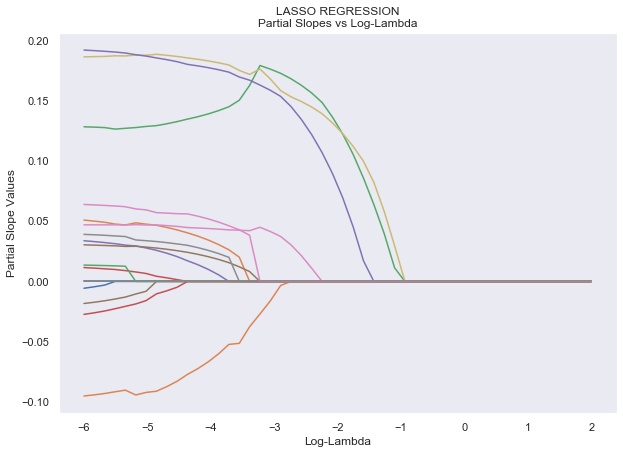

In [20]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.title('LASSO REGRESSION\nPartial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')
plt.grid()

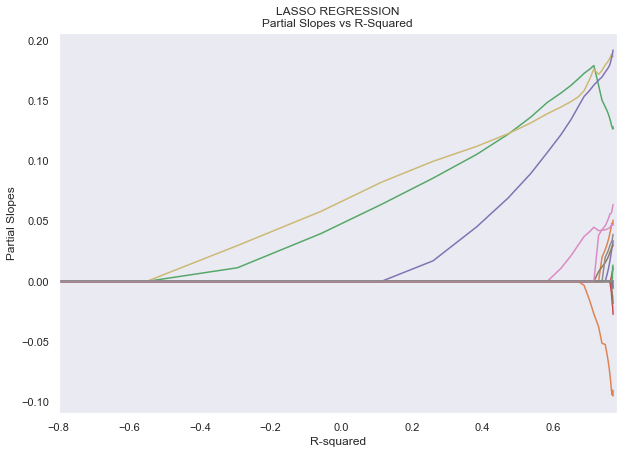

In [21]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([-0.8, 0.78])
plt.title('LASSO REGRESSION\nPartial Slopes vs R-Squared')
plt.ylabel('Partial Slopes')
plt.xlabel('R-squared')
plt.grid()

### Ridge Regression  
> 1. The partial slope vs. log-lambda using a Ridge regression model reflects much improved behavior over the LASSO regression model above.  
><br>  
> 2. The R-squared values diverge, just as shown above for the LASSO model, but are not irradic as log-lambda increases.

In [22]:
coeffs_array = []
rsq_array = []
for lamb in lambda_seq:
    ridge_model = sm.ols(formula, data=scale_df)
    ridge_result = ridge_model.fit_regularized(method='elastic_net', alpha=lamb, L1_wt=0.0)
    
    coeffs_array.append(list(ridge_result.params))
    ridge_predictions = ridge_result.fittedvalues
    ridge_residuals = [x - y for x, y in zip(np.squeeze(ridge_predictions), price_log)]

    SSR = np.sum(np.square(ridge_residuals))
    SST = np.sum(np.square(price_log - np.mean(price_log)))

    rsq = 1 - (SSR / SST)
    rsq_array.append(rsq)

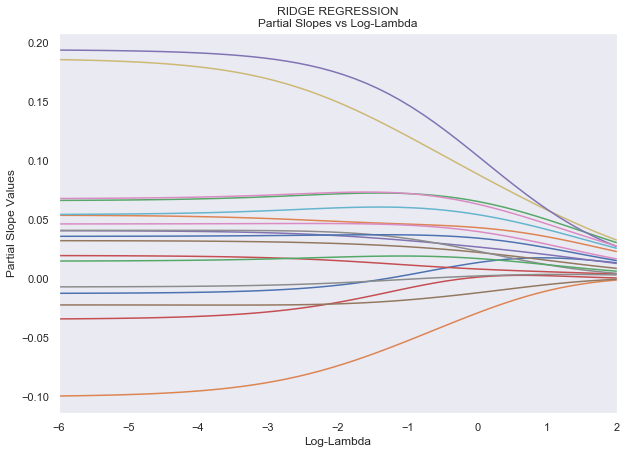

In [23]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.xlim([-6.0, 2.0])
plt.title('RIDGE REGRESSION\nPartial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')
plt.grid()

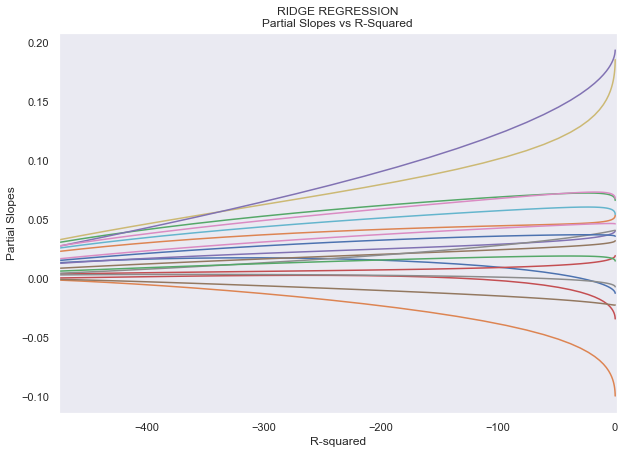

In [24]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([-475, 2])
plt.title('RIDGE REGRESSION\nPartial Slopes vs R-Squared')
plt.ylabel('Partial Slopes')
plt.xlabel('R-squared')
plt.grid()

### Elastic-Net Regression  
> The elastic-net combines the LASSO and Ridge regularization approaches, and the below results are tuned for (perceived) best outcomes.

In [25]:
coeffs_array = []
rsq_array = []
for lamb in lambda_seq:
    elastic_model = sm.ols(formula, data=scale_df)
    elastic_result = elastic_model.fit_regularized(method='elastic_net', alpha=lamb, L1_wt=0.05)
    
    coeffs_array.append(list(elastic_result.params))
    elastic_predictions = elastic_result.fittedvalues
    elastic_residuals = [x - y for x, y in zip(np.squeeze(elastic_predictions), price_log)]

    SSR = np.sum(np.square(elastic_residuals))
    SST = np.sum(np.square(price_log - np.mean(price_log)))

    rsq = 1 - (SSR / SST)
    rsq_array.append(rsq)

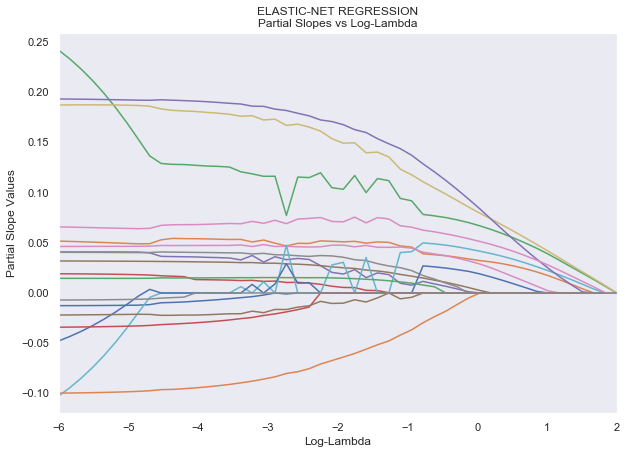

In [26]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.xlim([-6.0, 2.0])
plt.title('ELASTIC-NET REGRESSION\nPartial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')
plt.grid()

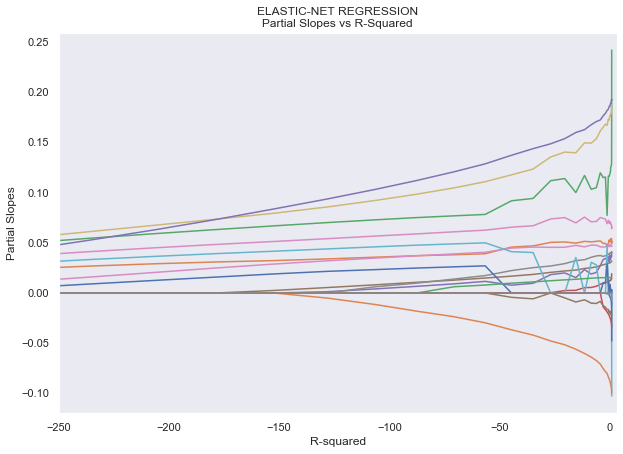

In [27]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([-250, 3.0])
plt.title('ELASTIC-NET REGRESSION\nPartial Slopes vs R-Squared')
plt.ylabel('Partial Slopes')
plt.xlabel('R-squared')
plt.grid()

## Conclusion

> 1. Overall, it is best to choose the ELastic-net model over the LASSO model. This can help displace the erratic behavior of the LASSO regression for several of the features therein are likely strongly correlated.  
><br>  
> 2. The log-lambda value given in the above Elastic-net results, shows that even small variations of introduced bias can introduce large variations, especially at larger log-lambda magnitudes.